<a href="https://colab.research.google.com/github/Yudaeun/Data_Analysis/blob/main/Prevention_of_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

In [ ]:
import numpy as np

In [ ]:
matrix_a=np.asarray([[4,5,2],
                    [5,2,6],
                    [6,1,-2]])
matrix_b=np.asarray([[5,9,2],
                     [2,0,3],
                     [1,-4,5]])
matrix_c=matrix_a+matrix_b
print(matrix_c)

[[ 9 14  4]
 [ 7  2  9]
 [ 7 -3  3]]


Numpy는 파이썬에서 가장 많이 쓰이고 있는 벡터나 행렬같은 수학적인 데이터 구조를 표현하고 연산하는 기본적인 기능이 효율적으로 구현되어 있는 수치 계산 라이브러리이다.

# Pandas 

Pandas는 numpy를 기반으로 고차원적인 데이터 처리를 할 수 있는 라이브러리이다. 동일한 데이터를 가진 Series를 기본으로 하고, 이를 여러개 묶어서 사용하는 DataFrame을 사용해서 표 형태로 된 자료를 다룬다.

In [ ]:
import pandas as pd

In [ ]:
col_id=pd.Series(data=[5,14,21,25])
col_team=pd.Series(data=['A','B','B','A'])
col_name=pd.Series(data=['루루','나나','미미','시루'])
col_score=pd.Series(data=[100,95,60,80])

df=pd.DataFrame(data={'Id':col_id,
                      'Team':col_team,
                      'Name':col_name,
                      'Scroe':col_score})
df.set_index('Id',inplace=True)
df

,Team,Name,Scroe
Id,,,
5,A,루루,100
14,B,나나,95
21,B,미미,60
25,A,시루,80


In [ ]:
df.groupby('Team').mean()

,Scroe
Team,
A,90.0
B,77.5


팀별 score 평균을 나타낸다.

# Matplotlib

Matplotlib는 파이썬에서 매트랩(매트랩 단어보니 속 안 좋아진다.) 스타일의 그래프를 그리기 위해 만들어진 오픈소스 패키지이다. 자세한 내용은 [matplotlib.org](https://matplotlib.org)에서 확인

In [ ]:
import matplotlib.pyplot as plt

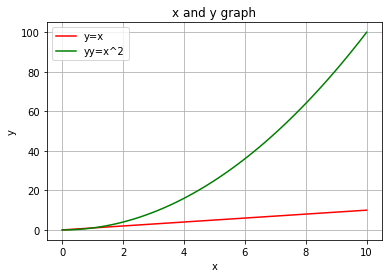

In [ ]:
x=np.linspace(0,10,100)
y=x
yy=x ** 2

fig=plt.figure()
ax=fig.gca() # 좌표축
ax.plot(x,y,'r-')
ax.plot(x,yy,'g-')
ax.set_title('x and y graph')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['y=x','yy=x^2'])
ax.grid()
fig.show()


0부터 10까지 1을 간격으로 100개의 1차원 배열이 만들어지고 그것을 바탕으로 그래프를 그린다. yy는 x^2이고 y=x 

# 의료 데이터를 분석해 심부전증 예방이 가능할까?

### 의료 데이터의 수집
* 의료 데이터는 민감한 개인정보가 많이 들어가 있기 때문에, 가명정보를 사용하게 하여 비식별화를 했다. 이를 통해 의료 데이터를 민간 사업체나 연구원들에게 바이오 데이터로써 제공할 수 있게 하여 큰 발전의 발판이 되었으며, 현재는 의료 데이터를 다룰 수 있는 사람들이 많이 필요해지고 있다.

### 의료 데이터 분석의 현재
* 의료 데이터는 핀란드, 덴마크, 영국, 미국, 중국 에서 많이 분석해오고 있었다. 그에 비해 우리나라는 아직 걸음마 단계이기 때문에 의료 데이터를 다루는 인재가 많이 필요하다.


# 1. DataSet 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Kaggle API Setting

In [2]:
import os

In [3]:
os.environ['KAGGLE_USERNAME']='yudaeun0918'
os.environ['KAGGLE_KEY']='3ebc0e802e33f64d11dce5442e93d2dc'

In [4]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 4.10MB/s]


In [6]:
!ls

heart-failure-clinical-data.zip  sample_data


In [7]:
!unzip '*.zip'

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


# 3. Pandas 라이브러리로 csv 파일 읽기

In [8]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [9]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [13]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000
